In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/Obesity.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2102 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2101 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2105 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2102 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2104 non-null   object 
 12  FAF                             21

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.488346,7.365358,2.00,19.947192,22.804818,26.000000,99.00
Height,2101.0,1.701995,0.093288,1.45,1.630000,1.701284,1.768834,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


In [5]:
df.isna().sum()

,0
Gender,9
Age,0
Height,10
Weight,0
family_history_with_overweight,6
FAVC,0
FCVC,0
NCP,0
CAEC,9
SMOKE,0


In [6]:
numerical_columns = df.select_dtypes(include=['int','float']).columns
print(numerical_columns)

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')


In [7]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [8]:
df['Height'].skew()

-0.015194284611644028

In [9]:
#Handling Missing values

In [10]:
df['Gender'].fillna(df['Gender'].mode().values[0],inplace=True)
df['family_history_with_overweight'].fillna(df['family_history_with_overweight'].mode().values[0],inplace=True)
df['CAEC'].fillna(df['CAEC'].mode().values[0],inplace=True)
df['SCC'].fillna(df['SCC'].mode().values[0],inplace=True)
df['MTRANS'].fillna(df['MTRANS'].mode().values[0],inplace=True)

In [11]:
df['Height'].fillna(df['Height'].median(),inplace=True)

In [12]:
#Duplicates detection and handling

In [13]:
df.duplicated().sum()

23

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
#outlier detection and handling

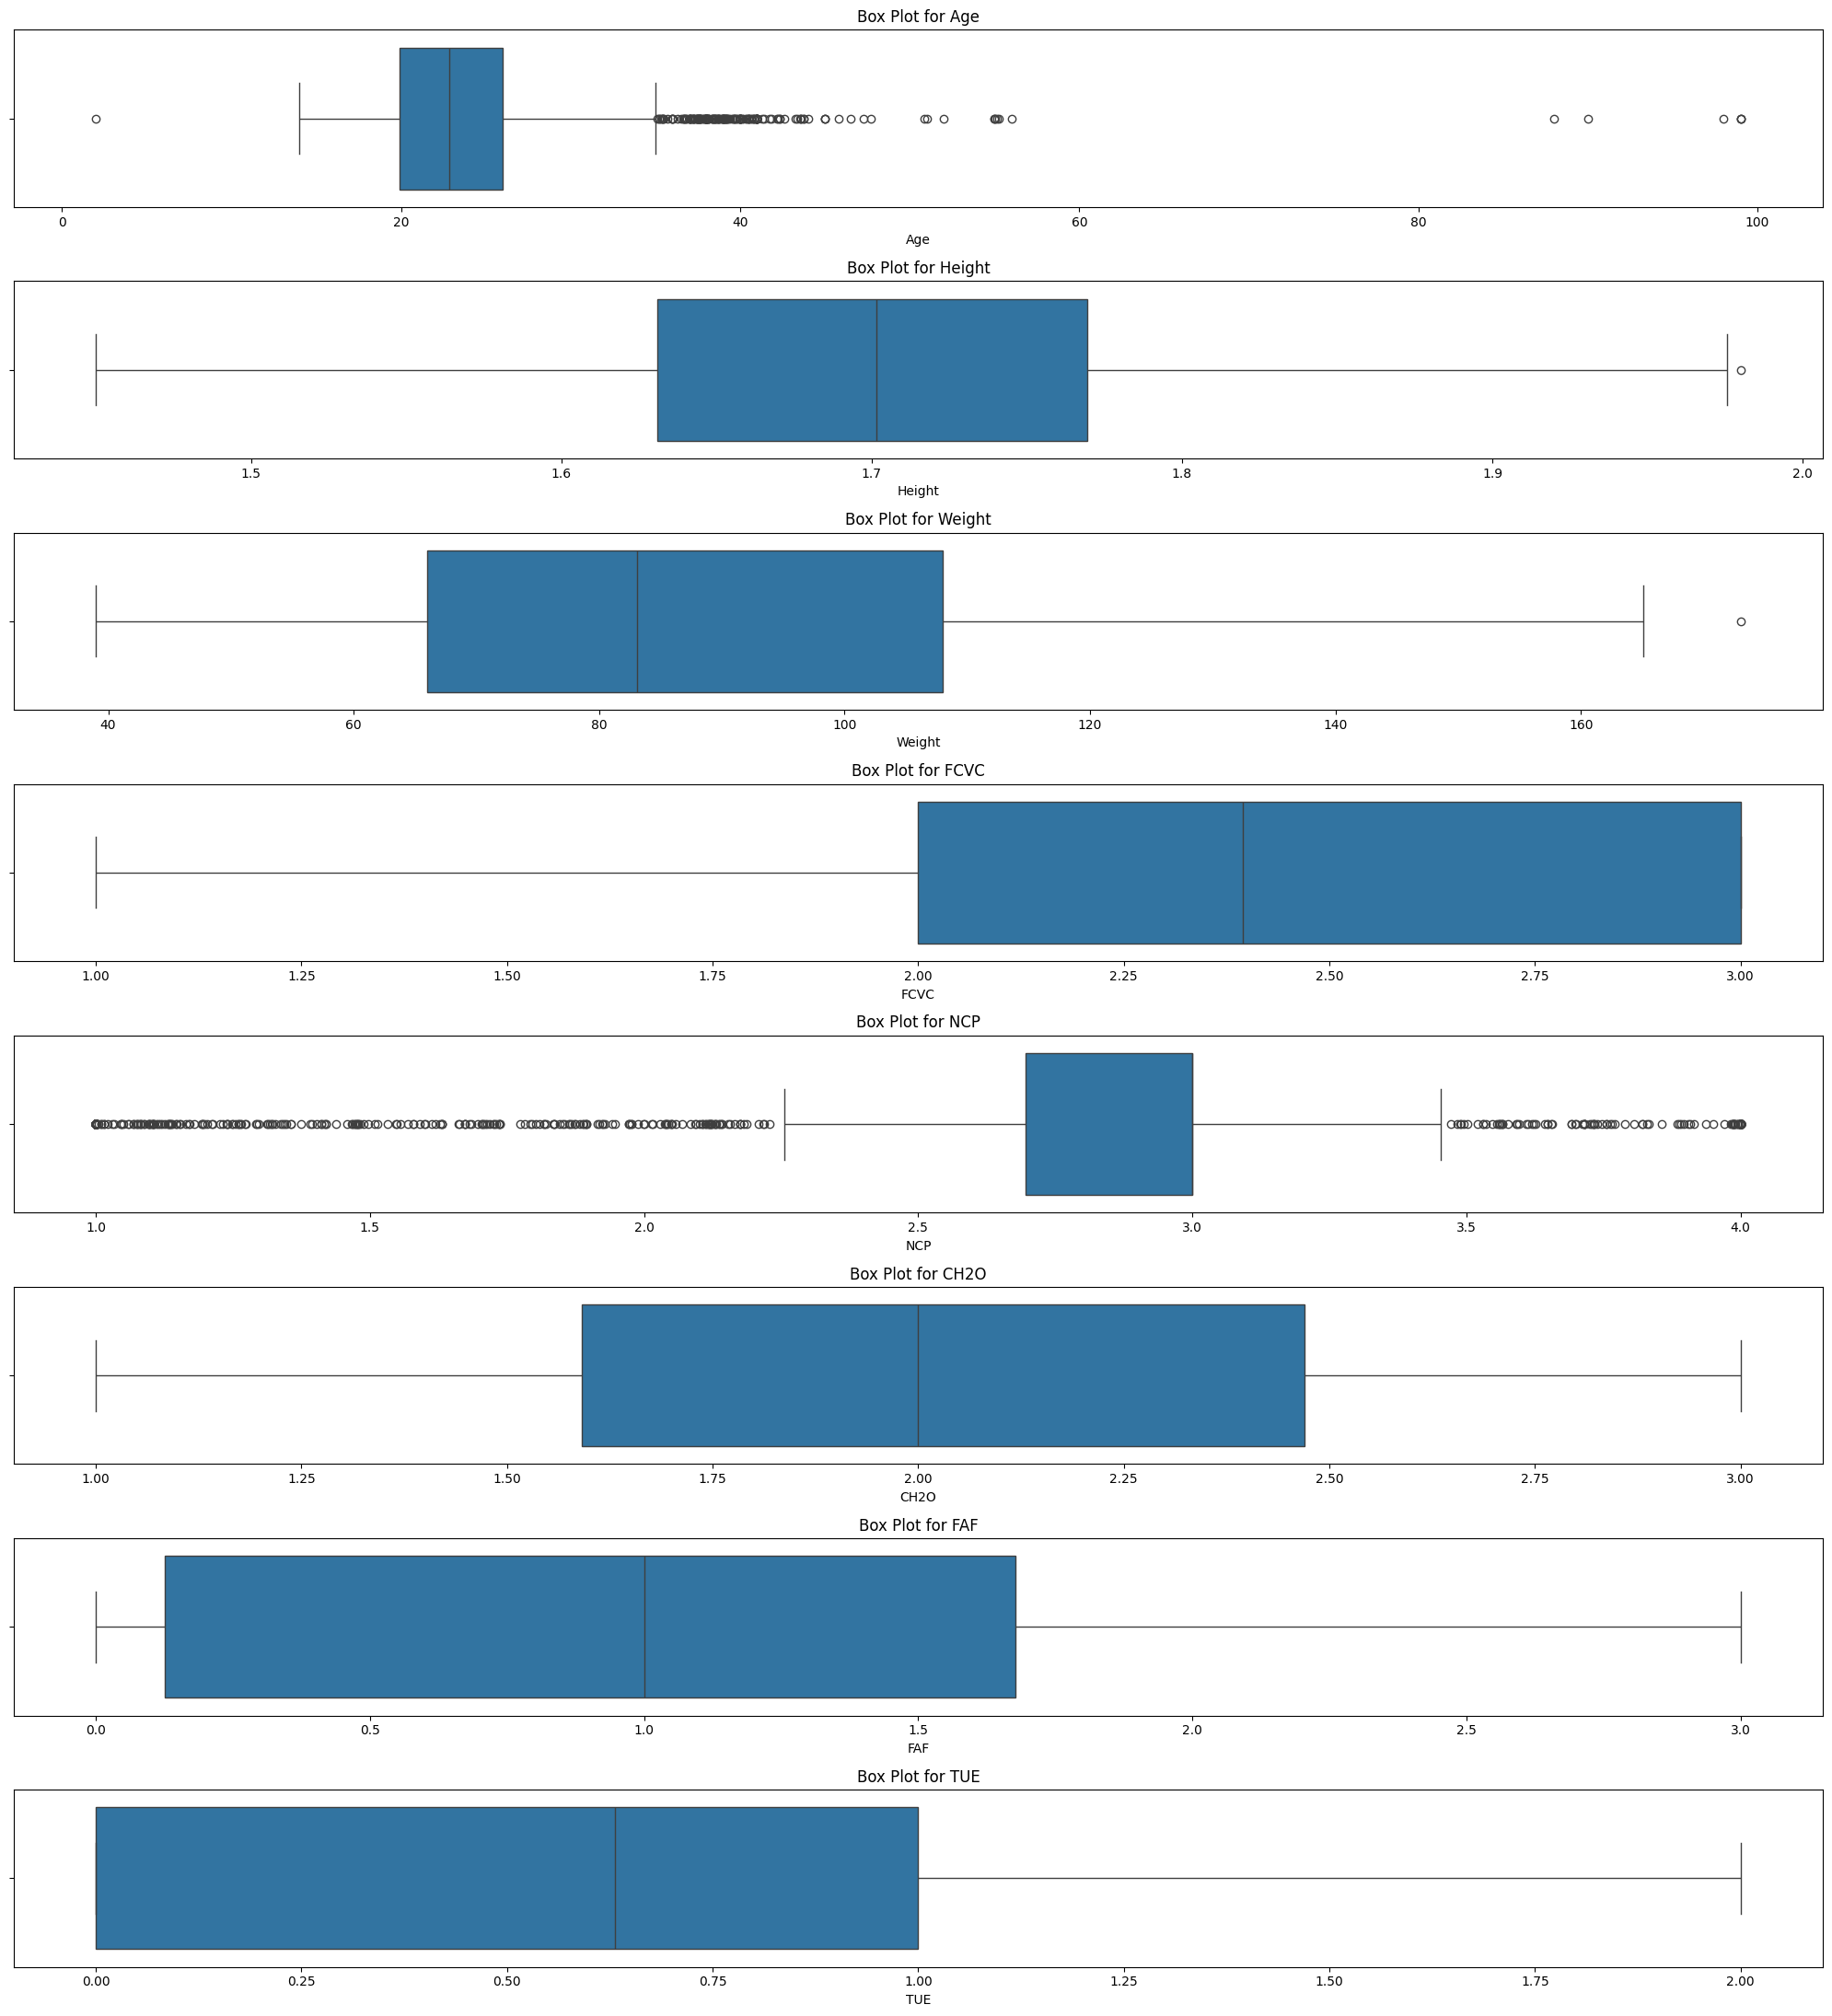

In [16]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(20, 22))

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 1, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [17]:
large_unique_col=df[['Age','NCP']]

In [18]:
for col in large_unique_col:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers= ((df[col] < lower_bound) | (df[col] > upper_bound))
    df[col] = df[col].where(~outliers, np.median(df[col]))

**EDA**

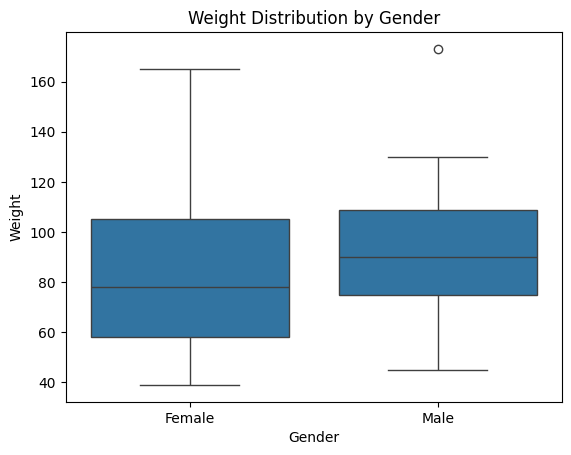

In [19]:
sns.boxplot(x='Gender', y='Weight', data=df)
plt.title('Weight Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Weight')
plt.show()

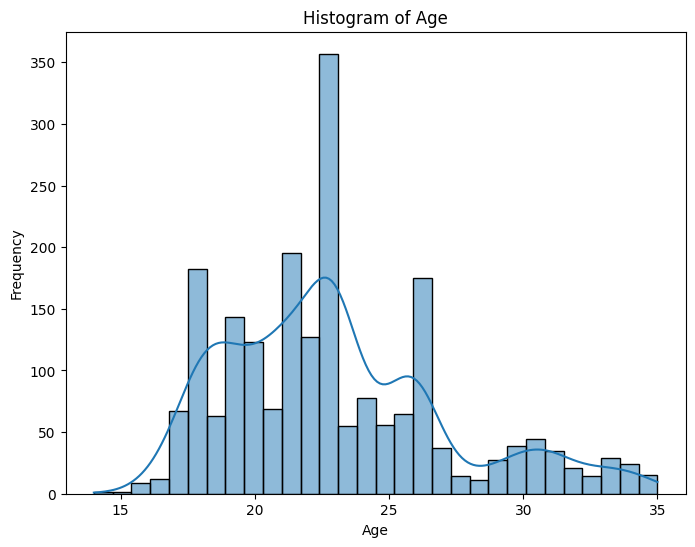

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title(f'Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

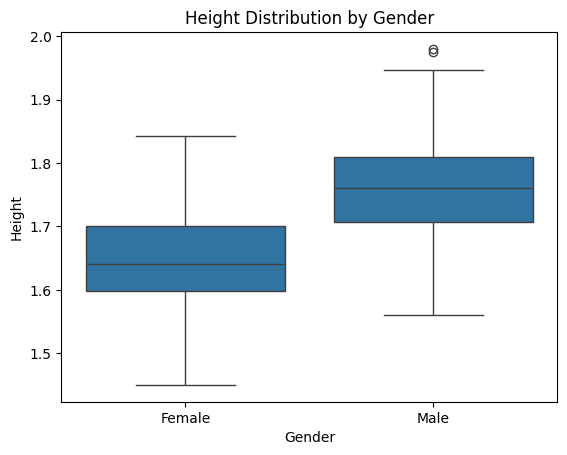

In [21]:
sns.boxplot(x='Gender', y='Height', data=df)
plt.title('Height Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Height')
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

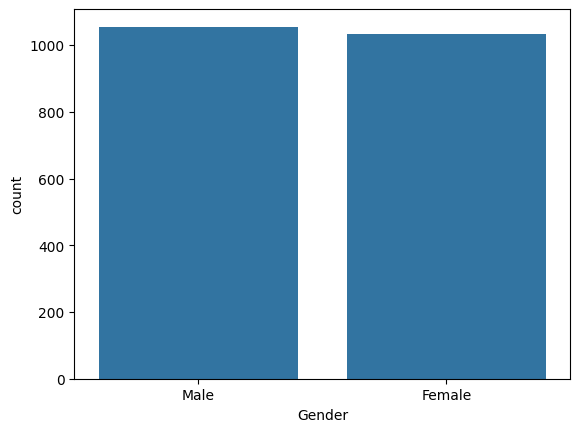

In [22]:
counter_gender = df['Gender'].value_counts()
sns.barplot(x = counter_gender.index, y = counter_gender)

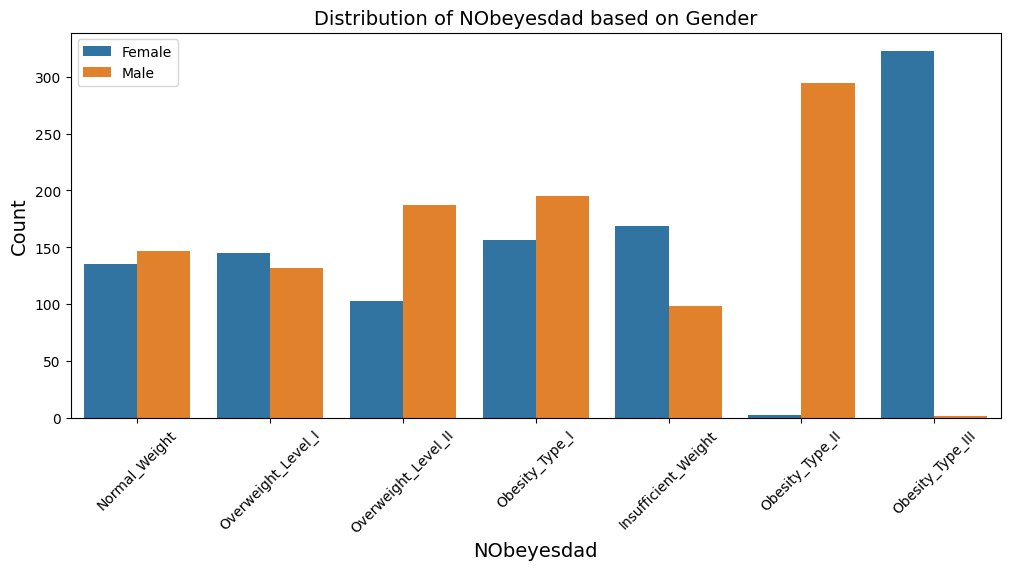

In [23]:
plt.figure(figsize=(12, 5))
sns.countplot(x='NObeyesdad', data=df, hue='Gender')
plt.title('Distribution of NObeyesdad based on Gender', fontsize=14)
plt.xlabel('NObeyesdad', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'NObeyesdad by category')

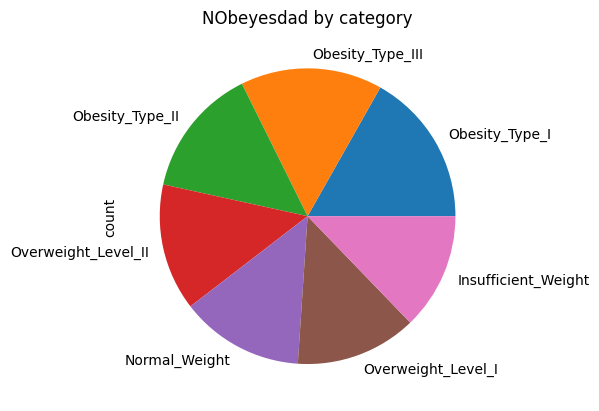

In [24]:
df['NObeyesdad'].value_counts().plot.pie()
plt.title("NObeyesdad by category")

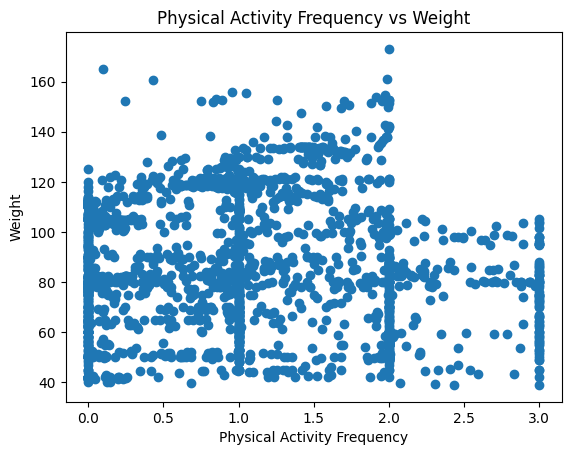

In [25]:
plt.scatter(df['FAF'], df['Weight'])
plt.title('Physical Activity Frequency vs Weight')
plt.xlabel('Physical Activity Frequency')
plt.ylabel('Weight')
plt.show()

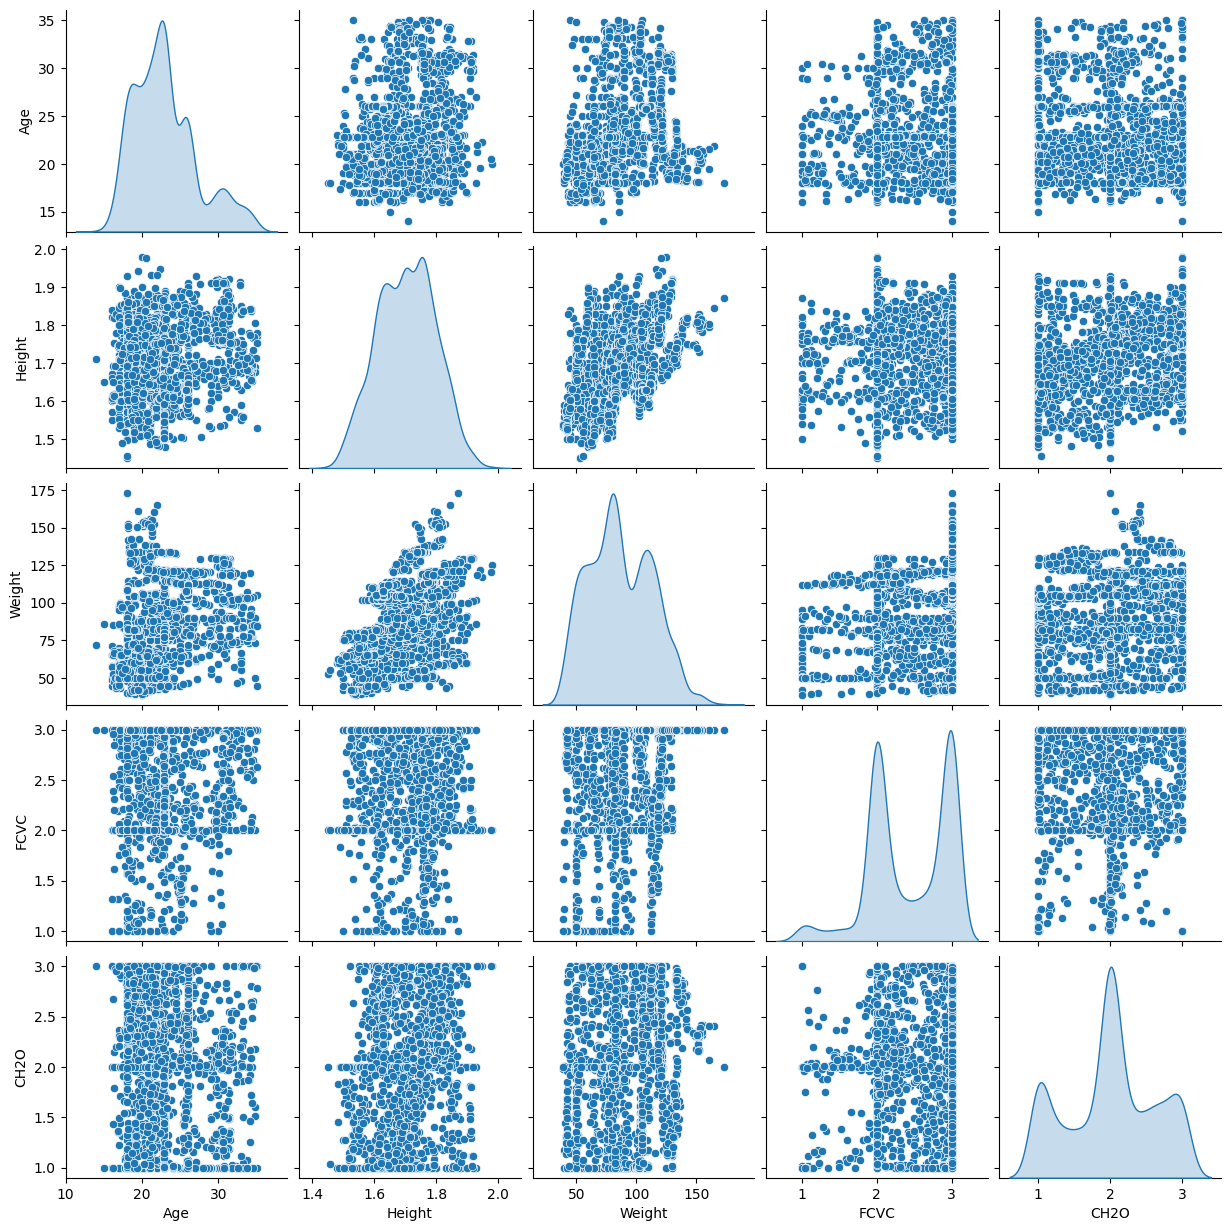

In [26]:
features = ['Age', 'Height', 'Weight', 'FCVC', 'CH2O']
sns.pairplot(df[features], diag_kind='kde')
plt.show()


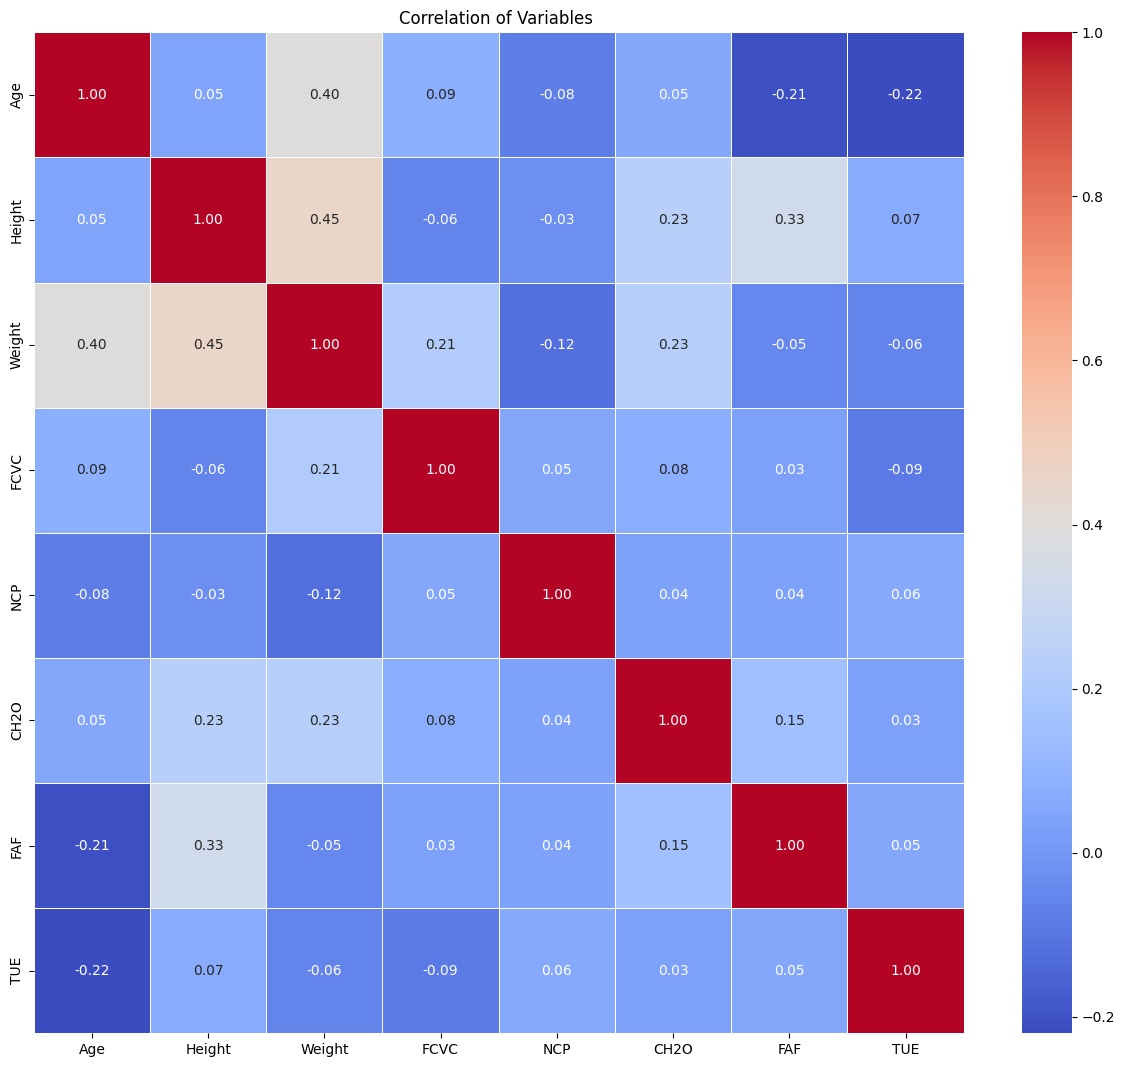

In [27]:
plt.figure(figsize=(15,13))
corrmatrix=df[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']].corr(method='spearman')
sns.heatmap(corrmatrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,xticklabels=corrmatrix.columns, yticklabels=corrmatrix.columns)
plt.title('Correlation of Variables ')
plt.show()


In [28]:
df['Gender'].value_counts()

,count
Gender,
Male,1055
Female,1033


In [29]:
df['family_history_with_overweight'].value_counts()

,count
family_history_with_overweight,
yes,1724
no,364


In [30]:
df['FAVC'].value_counts()

,count
FAVC,
yes,1845
no,243


In [31]:
df['CAEC'].value_counts()

,count
CAEC,
Sometimes,1763
Frequently,235
Always,53
no,37


In [32]:
df['SMOKE'].value_counts()

,count
SMOKE,
no,2044
yes,44


In [33]:
df['SCC'].value_counts()

,count
SCC,
no,1992
yes,96


In [34]:
df['CALC'].value_counts()

,count
CALC,
Sometimes,1381
no,636
Frequently,70
Always,1


In [35]:
df['MTRANS'].value_counts()

,count
MTRANS,
Public_Transportation,1562
Automobile,454
Walking,54
Motorbike,11
Bike,7


In [36]:
df['NObeyesdad'].value_counts()

,count
NObeyesdad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_II,290
Normal_Weight,282
Overweight_Level_I,277
Insufficient_Weight,267


In [37]:
from sklearn.calibration import LabelEncoder

In [38]:
df = pd.get_dummies(df, columns=['Gender', 'family_history_with_overweight', 'CAEC', 'SCC', 'CALC', 'MTRANS'])

In [39]:
df.columns

Index(['Age', 'Height', 'Weight', 'FAVC', 'FCVC', 'NCP', 'SMOKE', 'CH2O',
       'FAF', 'TUE', 'NObeyesdad', 'Gender_Female', 'Gender_Male',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'CAEC_Always', 'CAEC_Frequently',
       'CAEC_Sometimes', 'CAEC_no', 'SCC_no', 'SCC_yes', 'CALC_Always',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking'],
      dtype='object')

In [40]:
for i in df[['Gender_Female', 'Gender_Male',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'CAEC_Always', 'CAEC_Frequently',
       'CAEC_Sometimes', 'CAEC_no', 'SCC_no', 'SCC_yes', 'CALC_Always',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking']]:
       df[i]=df[i].astype(int)

In [41]:
le = LabelEncoder()
df['FAVC'] = le.fit_transform(df['FAVC'])
df['SMOKE'] = le.fit_transform(df['SMOKE'])
df['NObeyesdad'] = le.fit_transform(df['NObeyesdad'])

In [42]:
df.head().T

,0,1,2,3,4
Age,21.00,21.00,23.0,27.0,22.00
Height,1.62,1.52,1.8,1.8,1.78
Weight,64.00,56.00,77.0,87.0,89.80
FAVC,0.00,0.00,0.0,0.0,0.00
FCVC,2.00,3.00,2.0,3.0,2.00
NCP,3.00,3.00,3.0,3.0,3.00
SMOKE,0.00,1.00,0.0,0.0,0.00
CH2O,2.00,3.00,2.0,2.0,2.00
FAF,0.00,3.00,2.0,2.0,0.00
TUE,1.00,0.00,1.0,0.0,0.00


In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()

In [45]:
df[['Age', 'Height','Weight']] = scaler.fit_transform(df[['Age', 'Height','Weight']])

In [46]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [47]:
#random forest classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [50]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

In [51]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [52]:
y_pred = rf_classifier.predict(X_test)

In [53]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[50  3  0  0  0  0  0]
 [ 0 55  0  0  0  2  0]
 [ 0  1 67  0  0  0  2]
 [ 0  0  0 60  0  0  0]
 [ 0  0  0  1 64  0  0]
 [ 0  7  0  0  0 45  3]
 [ 0  4  0  0  0  2 52]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        53
           1       0.79      0.96      0.87        57
           2       1.00      0.96      0.98        70
           3       0.98      1.00      0.99        60
           4       1.00      0.98      0.99        65
           5       0.92      0.82      0.87        55
           6       0.91      0.90      0.90        58

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.95      0.94      0.94       418


Accuracy Score: 0.9401913875598086


In [54]:
#XGBClassifier

In [55]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score

In [56]:
xgb = XGBClassifier()

In [57]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [58]:
xgb_pred = xgb.predict(X_test)

In [59]:
xgb_accuracy = accuracy_score(y_test, xgb_pred)

In [60]:
print(xgb_accuracy)

0.9688995215311005


In [61]:
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("\nClassification Report:\n", classification_report(y_test, xgb_pred))
print("\nAccuracy Score:", accuracy_score(y_test, xgb_pred))

Confusion Matrix:
 [[53  0  0  0  0  0  0]
 [ 2 51  0  0  0  4  0]
 [ 0  0 70  0  0  0  0]
 [ 0  0  0 60  0  0  0]
 [ 0  0  0  1 64  0  0]
 [ 0  0  0  0  0 53  2]
 [ 0  0  0  1  0  3 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        53
           1       1.00      0.89      0.94        57
           2       1.00      1.00      1.00        70
           3       0.97      1.00      0.98        60
           4       1.00      0.98      0.99        65
           5       0.88      0.96      0.92        55
           6       0.96      0.93      0.95        58

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418


Accuracy Score: 0.9688995215311005


In [62]:
#hyper parameter tuning

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
param_grid = {
    'n_estimators': [120],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [65]:
xgb = XGBClassifier()

In [66]:
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

In [67]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [5],
                         'min_child_weight': [1, 2, 3], 'n_estimators': [120],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy', verbose=2)

In [68]:
print("Best Parameters:\n", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters:
 {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 120, 'subsample': 0.8}
Best Score: 0.9664670658682635


In [69]:
best_xgb = grid_search.best_estimator_

In [70]:
xgb_pred = best_xgb.predict(X_test)

In [71]:
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("\nClassification Report:\n", classification_report(y_test, xgb_pred))
print("\nAccuracy Score:", accuracy_score(y_test, xgb_pred))

Confusion Matrix:
 [[53  0  0  0  0  0  0]
 [ 1 53  0  0  0  3  0]
 [ 0  0 70  0  0  0  0]
 [ 0  0  0 60  0  0  0]
 [ 0  0  0  1 64  0  0]
 [ 0  1  0  0  0 52  2]
 [ 0  0  0  1  0  2 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       0.98      0.93      0.95        57
           2       1.00      1.00      1.00        70
           3       0.97      1.00      0.98        60
           4       1.00      0.98      0.99        65
           5       0.91      0.95      0.93        55
           6       0.96      0.95      0.96        58

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418


Accuracy Score: 0.9736842105263158


Accuracy Score: **0.9736842105263158**

---

